在scikit中有许多种不同的朴素贝叶斯分类器，主要的区别在于假设了不同的条件分布

In [1]:
from sklearn import datasets,model_selection,naive_bayes
import  numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 

%matplotlib inline 
warnings.filterwarnings("ignore")

In [2]:
def load_data():
    digits=datasets.load_digits()
    #分层抽样
    return model_selection.train_test_split(digits.data,digits.target,test_size=0.25,
                                            random_state=0)

In [8]:
#数据展示
def show_dgits():
    digits=datsets.digits()
    fig=plt.figure()
    print("vector from images 0 :",digits.data[0] )
    for i in range(25):
        ax=fig.add_subplot(5,5,i+1)
        ax.inshow(digits.images[i],cmap=plt.cm.gray_r,interpolation='nearest')
    plt.show()
    

# GaussianNB分类器

In [16]:
#测试贝叶斯分类器的函数
def test_GaussianNB(*data):
    X_train,X_test,y_train,y_test=data 
    cls=naive_bayes.GaussianNB()
    cls.fit(X_train,y_train)
    print('Training Score:%.2f' %cls.score(X_train,y_train))
    print('Testing Score:%.2f' %cls.score(X_test,y_test))
    

In [17]:
#调用test_GaussianNB函数
X_train,X_test,y_train,y_test=load_data() 
test_GaussianNB(X_train,X_test,y_train,y_test)

Training Score:0.85
Testing Score:0.84


# MultinomialNB 分类器

In [22]:
def test_MultiomialNB(*data):
    """测试MultiomialNB的用法"""
    X_train,X_test,y_train,y_test=data 
    cls=naive_bayes.MultinomialNB() 
    cls.fit(X_train,y_train)
    print('Training Score:%.2f' % cls.score(X_train,y_train))
    print('Testing Score:%.2f' %cls.score(X_test,y_test))

    
    
def test_MultiomialNB_alpha(*data):
    """测试不同alpha对预测性能的影响"""
    X_train,X_test,y_train,y_test=data
    alphas=np.logspace(-2,5,200)
    train_scores=[]
    test_scores=[]
    for alpha in alphas :
        cls=naive_bayes.MultinomialNB(alpha=alpha)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))
        
    #绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,train_scores,label='Training Score')
    ax.plot(alphas,test_scores,label='Testing Score')
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel('0,1,0')
    ax.set_title('MultiomialNB')
    ax.set_xscale('log')
    plt.show()
    


In [20]:
X_train,X_test,y_train,y_test=load_data() 
test_GaussianNB(X_train,X_test,y_train,y_test)

Training Score:0.91
Testing Score:0.90


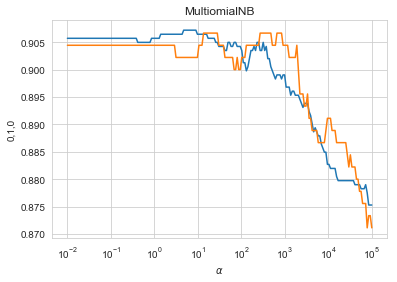

In [23]:
X_train,X_test,y_train,y_test=load_data() 
test_MultiomialNB_alpha(X_train,X_test,y_train,y_test)
sns.set_style('whitegrid')

# BernoulliNB贝叶斯分类器

In [27]:
def test_BernoulliNB(*data):
    X_trian,X_test,y_train,y_test=data 
    cls=naive_bayes.BernoulliNB()
    cls.fit(X_train,y_train)
    print('Training Score:%.2f' %cls.score(X_train,y_train))

    print('Testing Score:%.2f' %cls.score(X_test,y_test))
    
    
X_train,X_test,y_train,y_test=load_data() 
test_BernoulliNB(X_train,X_test,y_train,y_test)


Training Score:0.87
Testing Score:0.87


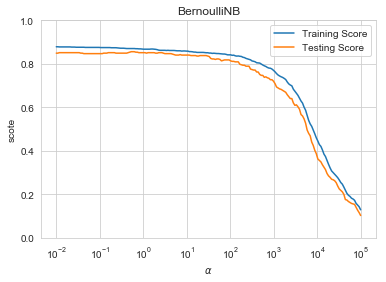

In [4]:
def test_BernoulliNB_alpha(*data):
    """BernoulliNB预测性能好随着alpha参数的影响"""
    X_train,X_test,y_train,y_test=data 
    alphas=np.logspace(-2,5,num=200)
    train_scores=[]
    test_scores=[]
    for alpha in alphas:
        cls=naive_bayes.BernoulliNB(alpha=alpha)#参数变化
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))
    #绘图
    
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,train_scores,label='Training Score')
    ax.plot(alphas,test_scores,label='Testing Score')
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel('scote')
    ax.set_ylim(0,1,0)
    ax.set_title('BernoulliNB')
    ax.set_xscale('log')
    ax.legend(loc='best')
    plt.show()
    
    
X_train,X_test,y_train,y_test=load_data() 
test_BernoulliNB_alpha(X_train,X_test,y_train,y_test)
sns.set_style('whitegrid')

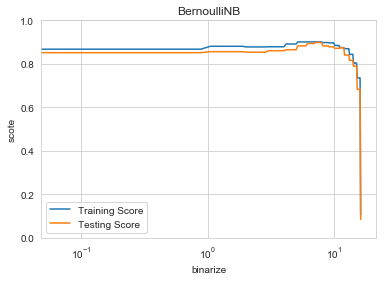

In [6]:
def test_BernoulliNB_binarize(*data):
    """BernoulliNB预测性能好随着binarize参数的影响"""
    X_train,X_test,y_train,y_test=data 
    min_x=min(np.min(X_train.ravel()),np.min(X_test.ravel()))-0.1
    max_x=max(np.max(X_train.ravel()),np.max(X_test.ravel()))+0.1
    binarizes=np.linspace(min_x,max_x,endpoint=True,num=100)
    train_scores=[]
    test_scores=[]
    for binarize in binarizes:
        cls=naive_bayes.BernoulliNB(binarize=binarize)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))
    #绘图
    
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(binarizes,train_scores,label='Training Score')
    ax.plot(binarizes,test_scores,label='Testing Score')
    ax.set_xlabel('binarize')
    ax.set_ylabel('scote')
    ax.set_ylim(0,1,0)
    ax.set_title('BernoulliNB')
    ax.set_xscale('log')
    ax.legend(loc='best')
    plt.show()
    
    
X_train,X_test,y_train,y_test=load_data() 
test_BernoulliNB_binarize(X_train,X_test,y_train,y_test)
sns.set_style('whitegrid')